In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import factorial

np.random.seed(42);

### What is Binomial Distribution

Binomial distribution tells us how likely, knowing the probability of success $p$,
we will get a certain amount of successes $k$ out of $N$ trials.


In [2]:
p = 0.9;  # probability of success
N = 7;  # number of trials

### Estimate by formula

Probability mass function for Binomial Distribution:
$$p_X(k) = P(X = k) = C^k_n p^k(1-p)^{n-k},\ \ k\in \{0,1,...,n \}$$

Formula for calculating combinations:
$$C^k_n = \dfrac{ n^{\underline{k}} }{k! } = \dfrac{n!}{(n-k)! \cdot k!}$$

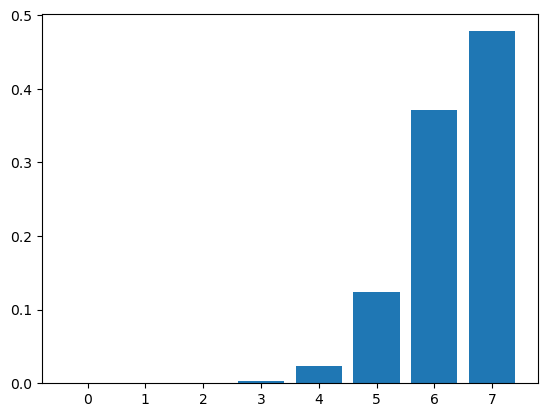

In [3]:
probs = {};

for k in range(N + 1):
    choose = factorial(N) / (factorial(k) * factorial(N - k));  # calculating choose k out of N combinations
    prob = choose * p**k * (1 - p)**(N - k);  # calculating probability value for k
    probs[k] = prob;  

plt.bar(probs.keys(), probs.values());

In [4]:
display(pd.Series(probs).round(4));

0    0.0000
1    0.0000
2    0.0002
3    0.0026
4    0.0230
5    0.1240
6    0.3720
7    0.4783
dtype: float64

### Run an actual experiment

In [5]:
# function for "flipping a coin"
make_trial = lambda: np.random.random() < p;
make_trial()

True

In [6]:
# function for conducting one experiment
def conduct_experiment(N):
    trials = [];
    
    # make N trials (flip the coin N times)
    for i in range(N):
        trial_result = make_trial();
        trials.append(trial_result);
        
    # return the total amount of successes out of N trials
    return sum(trials);

conduct_experiment(N)

6

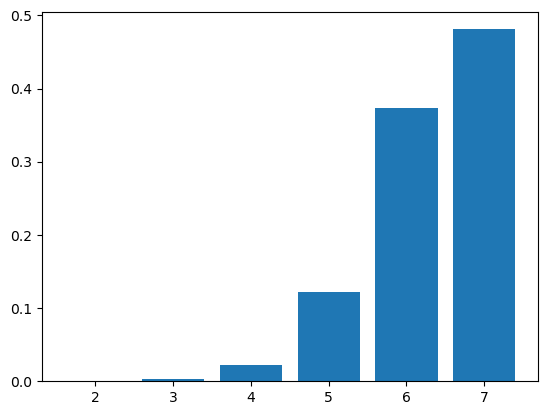

In [7]:
# decide on number of experiments
N_exp = 10000;
exp_results = [];

# run an experiment specified number of times
for i in range(N_exp):
    exp_result = conduct_experiment(N);
    exp_results.append(exp_result);

# summarize the results of all experiments, similar to `value_counts` in pandas
labels, counts = np.unique(exp_results, return_counts=True)
counts = counts / np.sum(counts)  # convert counts to probabilities

plt.bar(labels, counts);